# Credit Risk Analysis

### NECESSARY IMPORTS

In [1]:
# import boto3
# import os
# import sys
# import numpy as np
# import pandas as pd

# from dotenv import load_dotenv #for env variables
from imp import reload #for testing

from src import data_utils, config


/tmp/ipykernel_19876/3701889429.py:8: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload #for testing


### GET DATA

In [2]:
reload(data_utils)
reload(config)

# get data
app_train, app_test, columns_description = data_utils.get_datasets()


/home/chris/Learning-2023/anyoneai_dir/endproj/credit-risk-analysis/src/data_utils.py:51: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  app_train = pd.read_csv(config.DATASET_TRAIN, delimiter='\t', encoding='latin1', header=None)


In [3]:
app_train.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [4]:
columns_description

,Var_Title,Var_Description,Field_Content
Var_Id,,,
1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
2,CLERK_TYPE,Not informed,C
3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"
6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2
7,SEX,NaN,"M=Male, F=Female"
8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."


### EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
metadata = columns_description
meta_cols = metadata["Var_Title"].to_list()

- there are 2 columns with the same name "EDUCATION_LEVEL" 
- first is for general education level
- second is for mate education level
- the second column aggregate with "EDUCATION_LEVEL_MATE"

In [7]:
meta_cols[43] = "MATE_EDUCATION_LEVEL"
app_train.columns = meta_cols
app_test.columns = meta_cols[:-1]
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [8]:
app_train.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [9]:
idx=app_train.columns.get_loc("QUANT_DEPENDANTS")
idx

8

In [10]:
col_unique = {}
for col in app_train.columns.values:
    col_unique[col] = set(app_train[col])
col_unique["CLERK_TYPE"]

{'C'}

In [11]:
app_train.select_dtypes(include="number").columns

Index(['ID_CLIENT', 'PAYMENT_DAY', 'QUANT_ADDITIONAL_CARDS',
       'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS',
       'EDUCATION_LEVEL', 'NACIONALITY', 'RESIDENCE_TYPE',
       'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS',
       'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE',
       'MATE_PROFESSION_CODE', 'MATE_EDUCATION_LEVEL',
       'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF',
       'FLAG_INCOME_PROOF', 'PRODUCT', 'AGE', 'TARGET_LABEL_BAD=1'],
      dtype='object')

In [12]:
app_train.select_dtypes(exclude="number").columns

Index(['CLERK_TYPE', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'STATE_OF_BIRTH',
       'CITY_OF_BIRTH', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY',
       'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'RESIDENCIAL_PHONE_AREA_CODE', 'FLAG_MOBILE_PHONE', 'COMPANY',
       'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH',
       'FLAG_PROFESSIONAL_PHONE', 'PROFESSIONAL_PHONE_AREA_CODE',
       'FLAG_ACSP_RECORD', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3'],
      dtype='object')

In [13]:
app_train.T.iloc[:,:4]

,0,1,2,3
ID_CLIENT,1,2,3,4
CLERK_TYPE,C,C,C,C
PAYMENT_DAY,5,15,5,20
APPLICATION_SUBMISSION_TYPE,Web,Carga,Web,Web
QUANT_ADDITIONAL_CARDS,0,0,0,0
POSTAL_ADDRESS_TYPE,1,1,1,1
SEX,F,F,F,F
MARITAL_STATUS,6,2,2,2
QUANT_DEPENDANTS,1,0,0,0
EDUCATION_LEVEL,0,0,0,0


- show distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship

In [14]:
def compute_stats_count(field):
    count = app_train[field].value_counts().values
    index = app_train[field].value_counts().index
    perc = app_train[field].value_counts().values/len(app_train[field])*100
    return list(zip(index,count,perc))

In [15]:
def percsns(ax,col_stats):
    patches = ax.patches
    for i in range(len(patches)):
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+.05
        ax.annotate("({},{:.1f})%".format(col_stats[i][1],col_stats[i][2]),(x,y),ha="center")


         Total    Percent
0        36959    73.9 
1        13041    26.1 


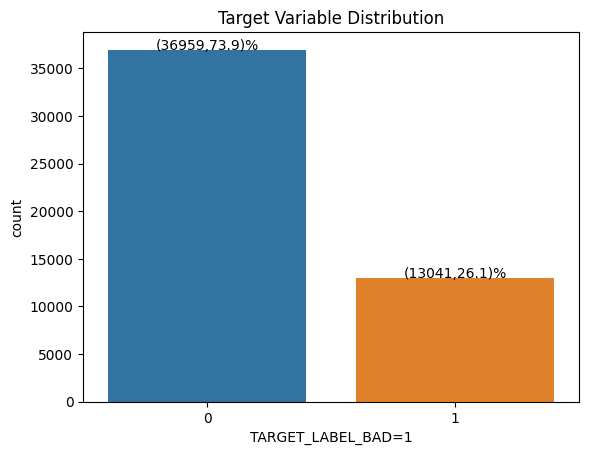

In [16]:
#col_target
target_colname = "TARGET_LABEL_BAD=1"
# get index,count and percentage with compute_stats_count function
target_dist = compute_stats_count(target_colname)
#target_dist.sort(key=lambda x:x[1],reverse=True)

print("{:<8} {:<8} {:<5}".format("","Total","Percent"))
for current_target_dist in target_dist:
    print("{:<8} {:<8} {:<5.1f}".format(
        current_target_dist[0], 
        current_target_dist[1], 
        current_target_dist[2])
    )
    
plt.title("Target Variable Distribution")
ax = sns.countplot(x=app_train[target_colname])
percsns(ax,target_dist)

- Show number of columns of each data type

In [17]:
number_fields = app_train.select_dtypes("number").columns

In [18]:
# show number of columns per data type
float_fields = len(app_train.select_dtypes("float64").columns)
int_fields = len(app_train.select_dtypes("int64").columns)
object_fields = len(app_train.select_dtypes("object").columns)

print(f"float64: {float_fields}")
print(f"int64: {int_fields}")
print(f"object: {object_fields}")

float64: 9
int64: 25
object: 20


- unique values for categorical columns

In [19]:
# show number of unique values per categorical column
object_field_name = app_train.select_dtypes("object").columns.to_list()
for object_field in object_field_name:
    print("{:<30}{}".format(object_field,len(app_train[object_field].unique())))


CLERK_TYPE                    1
APPLICATION_SUBMISSION_TYPE   3
SEX                           4
STATE_OF_BIRTH                29
CITY_OF_BIRTH                 9910
RESIDENCIAL_STATE             27
RESIDENCIAL_CITY              3529
RESIDENCIAL_BOROUGH           14511
FLAG_RESIDENCIAL_PHONE        2
RESIDENCIAL_PHONE_AREA_CODE   102
FLAG_MOBILE_PHONE             1
COMPANY                       2
PROFESSIONAL_STATE            28
PROFESSIONAL_CITY             2237
PROFESSIONAL_BOROUGH          5058
FLAG_PROFESSIONAL_PHONE       2
PROFESSIONAL_PHONE_AREA_CODE  87
FLAG_ACSP_RECORD              1
RESIDENCIAL_ZIP_3             1481
PROFESSIONAL_ZIP_3            1481


- Percentage of missing data for each column

In [20]:
# checking missing data

index_missings = app_train.isna().sum().index
missing_count = app_train.isna().sum()
missing_perc = app_train.isna().sum()/len(app_train)*100

ind_missing_count = list(zip(index_missings,missing_count,missing_perc))
ind_missing_count.sort(key=lambda x:x[1],reverse=True)

print("{:<28} {:<8} {:<5}".format("","Total","Percent"))
for missing in ind_missing_count[:20]:
    print("{:<28} {:<8} {:<5.1f}".format(missing[0], missing[1], missing[2]))

                             Total    Percent
PROFESSIONAL_CITY            33783    67.6 
PROFESSIONAL_BOROUGH         33783    67.6 
MATE_EDUCATION_LEVEL         32338    64.7 
MATE_PROFESSION_CODE         28884    57.8 
PROFESSION_CODE              7756     15.5 
OCCUPATION_TYPE              7313     14.6 
MONTHS_IN_RESIDENCE          3777     7.6  
RESIDENCE_TYPE               1349     2.7  
ID_CLIENT                    0        0.0  
CLERK_TYPE                   0        0.0  
PAYMENT_DAY                  0        0.0  
APPLICATION_SUBMISSION_TYPE  0        0.0  
QUANT_ADDITIONAL_CARDS       0        0.0  
POSTAL_ADDRESS_TYPE          0        0.0  
SEX                          0        0.0  
MARITAL_STATUS               0        0.0  
QUANT_DEPENDANTS             0        0.0  
EDUCATION_LEVEL              0        0.0  
STATE_OF_BIRTH               0        0.0  
CITY_OF_BIRTH                0        0.0  


In [21]:
cols_with_missings = [missing[0] for missing in ind_missing_count[:20] if missing[1]>0]
cols_with_missings

['PROFESSIONAL_CITY',
 'PROFESSIONAL_BOROUGH',
 'MATE_EDUCATION_LEVEL',
 'MATE_PROFESSION_CODE',
 'PROFESSION_CODE',
 'OCCUPATION_TYPE',
 'MONTHS_IN_RESIDENCE',
 'RESIDENCE_TYPE']

- Visualization of missing values

In [22]:
import missingno as msno

<Axes: >

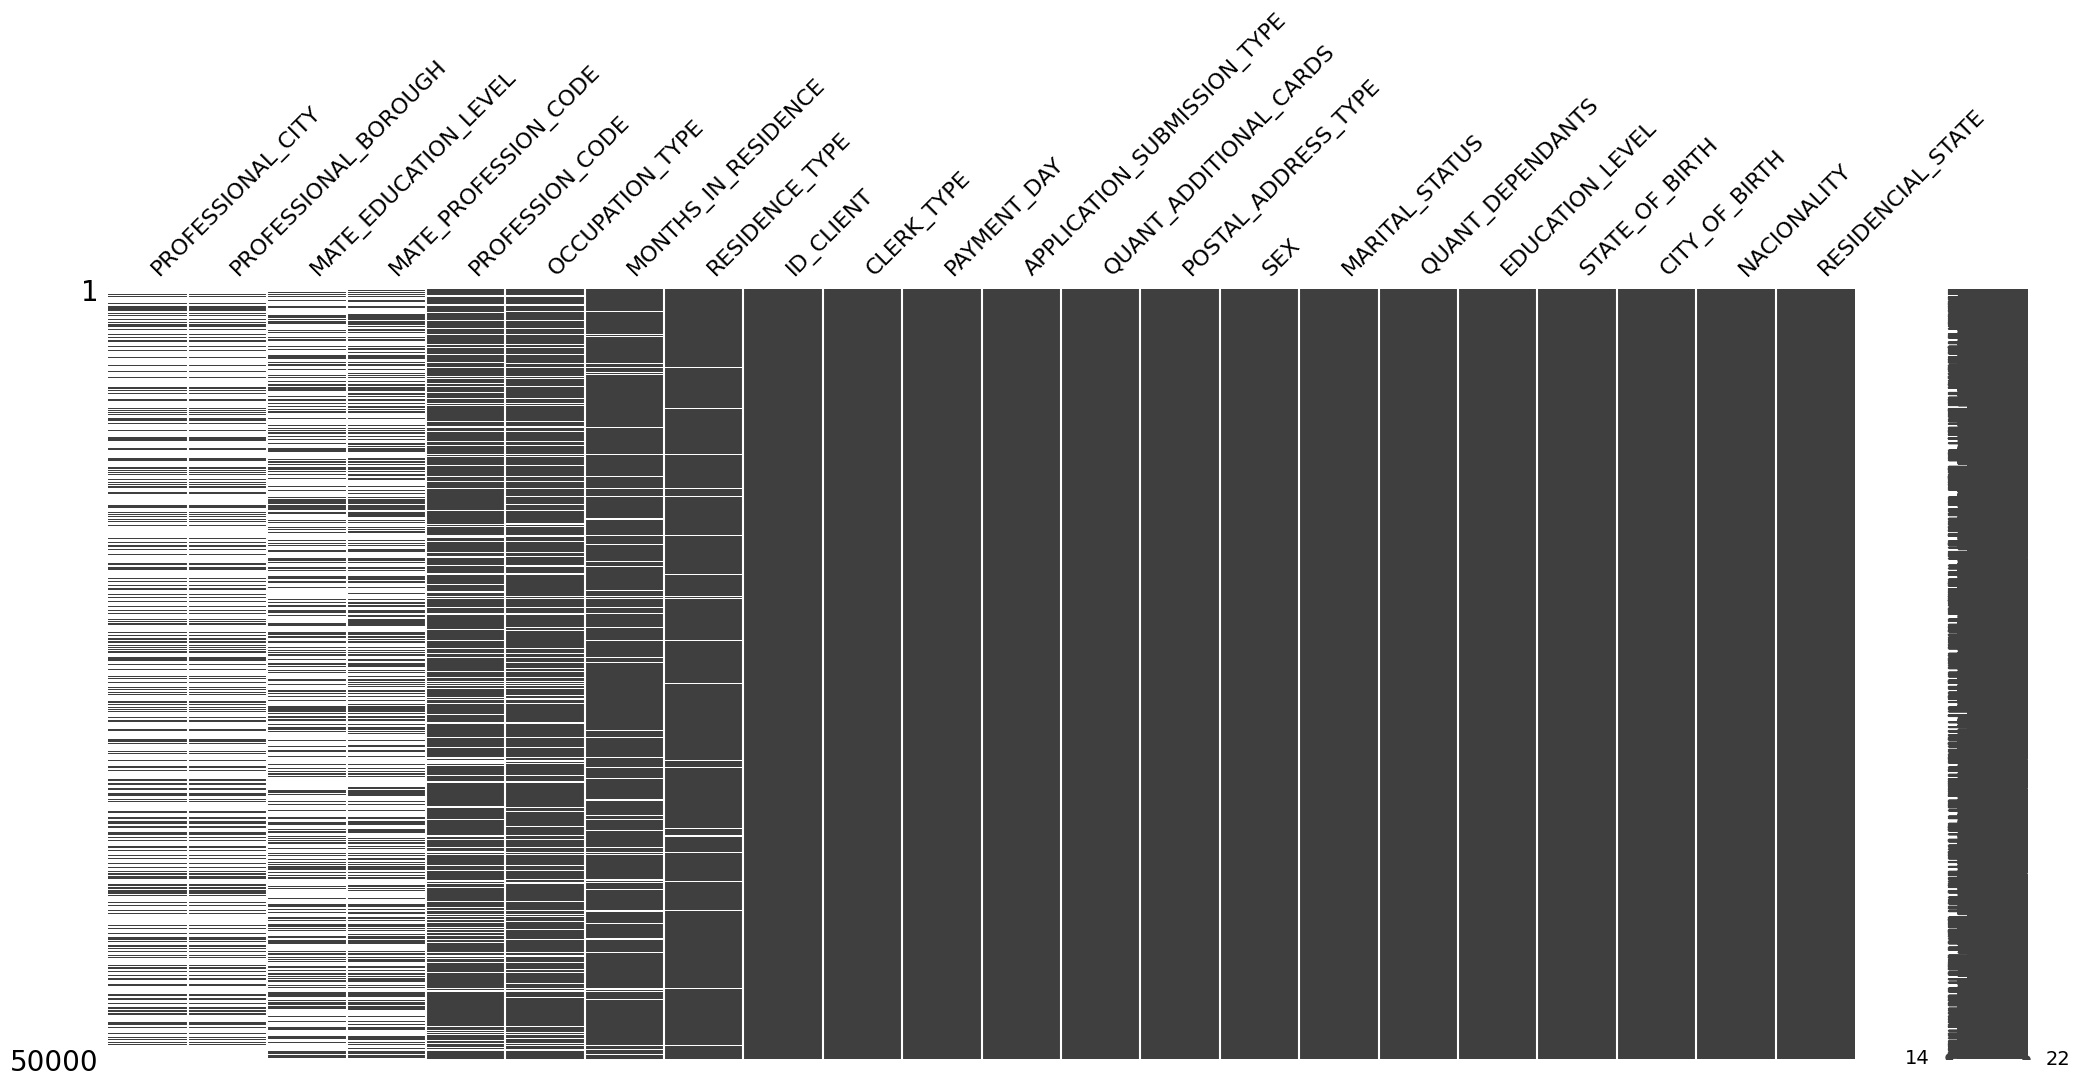

In [23]:
first_colwithnulls = [colwithnulls[0] for colwithnulls in ind_missing_count[:22]]
msno.matrix(app_train[first_colwithnulls])

#### Analyzing distribution of variables
- Show distribution of credit amounts

* Analyzing PERSONAL_MONTHLY_INCOME
  * it is the applicant's personal regular monthly income in Brazilian currency (R$)
  * it will be cast to (dollars$)

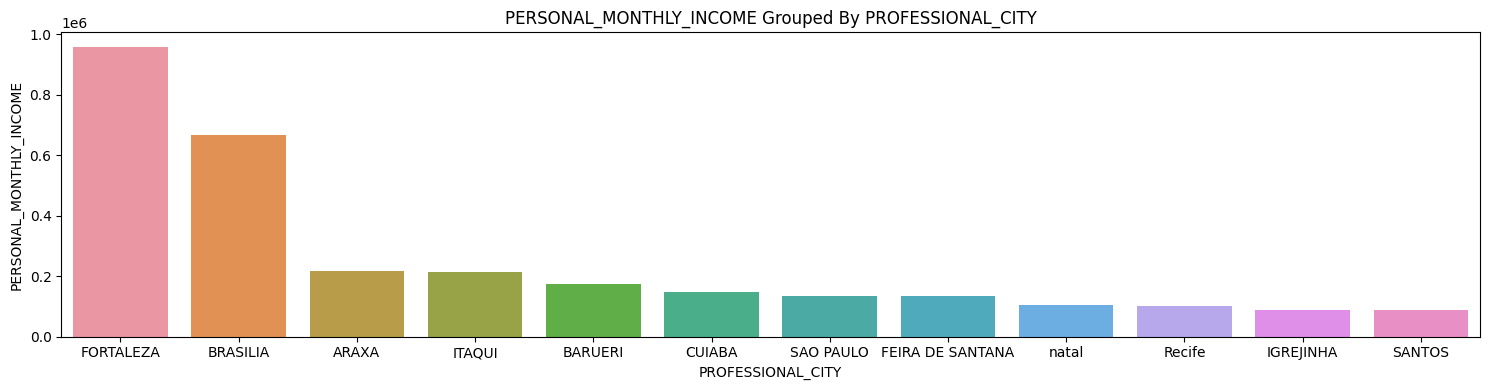

In [24]:
income_colname = "PERSONAL_MONTHLY_INCOME"
other_colname = "PROFESSIONAL_CITY"
df_order_by_income = app_train.sort_values(by=[income_colname],ascending=False,ignore_index=True)
df_income_plot = df_order_by_income.loc[:30,[income_colname,other_colname]]

plt.figure(figsize=(15,4))
plt.title(income_colname+" Grouped By "+other_colname)
sns.barplot(x=df_income_plot[other_colname],y=df_income_plot[income_colname])
plt.tight_layout()

### Analyzing Numerical columns

In [25]:
# colname = "AGE"
# # distribution of AGE
# fig,axs=plt.subplots(1,2,figsize=(12,3))
# sns.histplot(app_train[colname], bins=50,ax=axs[0])
# axs[0].set_title(colname+" Ditribution")
# sns.boxplot(x=app_train[colname],ax=axs[1])
# axs[1].set_title("Box Plot of "+colname+" Dist")

In [26]:
def trunc(valor,liminf, limsup):
        if(valor < liminf):
            return liminf
        if(valor > limsup):
            return limsup
        if(valor > liminf and valor < limsup):
            return valor

def compute_limits(df,field):
    q1 = np.percentile(df[field], 25)
    q3 = np.percentile(df[field], 75)
    iqr = q3 - q1
    limsup = q3 + 1.5 * iqr
    liminf = q1 - 1.5 * iqr
    return liminf, limsup

def plot_outliers(df,field):
    fig,axs = plt.subplots(1,2, figsize=(10,2))
    sns.boxplot(x=df[field],ax=axs[0])
    sns.boxplot(x=df["new"+field],ax=axs[1])
    
def proc_outliers(df,field):  
    # impute nans with mean value of column
    df[field].replace({np.nan: df[field].mean()}, inplace=True)
    
    # compute quantiles
    liminf, limsup = compute_limits(df,field)
    
    # apply truncated function        
    df["new"+field] = df[field].apply(lambda val: trunc(val,liminf,limsup))
    
    # plot before and after of correct outliers
    plot_outliers(df,field)

    # update dataframe
    df[field] = df["new"+field]
    df.drop(["new"+field],axis=1, inplace=True)
        
# process outliers
# print(f"Processing outliers on DAYS_EMPLOYED")
# proc_outliers(working_train_df,"DAYS_EMPLOYED")
# proc_outliers(working_val_df,"DAYS_EMPLOYED")

In [27]:
metadata_dic = {colname:idx for idx,colname in enumerate(meta_cols)}

- Column ID_CLIENT

In [28]:
# show number of unique values per categorical column
number_field_name = app_train.select_dtypes("number").columns.to_list()

In [29]:
idxs_number_cols = [metadata_dic[number_colname] for number_colname in number_field_name]

In [30]:
metadata.iloc[idxs_number_cols,[0,2]]

,Var_Title,Field_Content
Var_Id,,
1,ID_CLIENT,"1-50000, 50001-70000, 70001-90000"
3,PAYMENT_DAY,"1,5,10,15,20,25"
5,QUANT_ADDITIONAL_CARDS,"1,2,NULL"
6,POSTAL_ADDRESS_TYPE,1.2
8,MARITAL_STATUS,"1,2,3,4,5,6,7"
9,QUANT_DEPENDANTS,"0, 1, 2, ..."
10,EDUCATION_LEVEL,"1,2,3,4,5"
13,NACIONALITY,"0, 1, 2"
19,RESIDENCE_TYPE,"1,2,3,4,5,NULL"


In [31]:
for number_field in number_field_name:
    print("{:<32}{:<8}{}".format(number_field,len(app_train[number_field].unique()),metadata.iloc[metadata_dic[number_field],2]))

ID_CLIENT                       50000   1-50000, 50001-70000, 70001-90000
PAYMENT_DAY                     6       1,5,10,15,20,25
QUANT_ADDITIONAL_CARDS          1       1,2,NULL
POSTAL_ADDRESS_TYPE             2       1.2
MARITAL_STATUS                  8       1,2,3,4,5,6,7
QUANT_DEPENDANTS                17      0, 1, 2, ...
EDUCATION_LEVEL                 1       1,2,3,4,5
NACIONALITY                     3       0, 1, 2
RESIDENCE_TYPE                  7       1,2,3,4,5,NULL
MONTHS_IN_RESIDENCE             89      1,2,... , NULL
FLAG_EMAIL                      2       0.1
PERSONAL_MONTHLY_INCOME         5495    nan
OTHER_INCOMES                   615     nan
FLAG_VISA                       2       0.1
FLAG_MASTERCARD                 2       0.1
FLAG_DINERS                     2       0.1
FLAG_AMERICAN_EXPRESS           2       0.1
FLAG_OTHER_CARDS                2       0,1,NULL
QUANT_BANKING_ACCOUNTS          3       0,1,2
QUANT_SPECIAL_BANKING_ACCOUNTS  3       0,1,2
PERSONAL_ASSE

In [32]:
# colums with missings
cols_with_missings

['PROFESSIONAL_CITY',
 'PROFESSIONAL_BOROUGH',
 'MATE_EDUCATION_LEVEL',
 'MATE_PROFESSION_CODE',
 'PROFESSION_CODE',
 'OCCUPATION_TYPE',
 'MONTHS_IN_RESIDENCE',
 'RESIDENCE_TYPE']

#### Cleaning Data

In [280]:
def plotting_distribution(col_name,train,test):
    fig,axes = plt.subplots(2,2, figsize=(6,3))
    fig.suptitle("Distribution of "+col_name)
    fig.align_labels()

    if(train[col_name].var() != 0):
        sns.kdeplot(ax=axes[0][0],x=train.loc[:,col_name],fill=True)
    else:
        sns.histplot(ax=axes[0][0],x=train.loc[:,col_name],fill=True)
    if(test[col_name].var() != 0):
        sns.kdeplot(ax=axes[1][0],x=test.loc[:,col_name],fill=True)
    else:
        sns.histplot(ax=axes[1][0],x=test.loc[:,col_name],fill=True)

    sns.boxplot(ax=axes[0][1],x=train[col_name])
    sns.boxplot(ax=axes[1][1],x=test[col_name])
    axes[0][0].set_ylabel('Train')
    axes[1][0].set_ylabel('Test')
    plt.tight_layout()
    plt.show()
    plt.close(fig)
    
    

In [281]:
# cloning app_train
app_train_cop = app_train.copy()
app_test_cop = app_test.copy()
# show number of unique values per categorical column
number_field_name = app_train.select_dtypes("number").columns.to_list()

In [156]:
# delete ID_CLIENT because it is only an index
curr_col_name = "ID_CLIENT"
app_train_cop.drop(columns=[curr_col_name],inplace=True)
number_field_name.remove(curr_col_name)

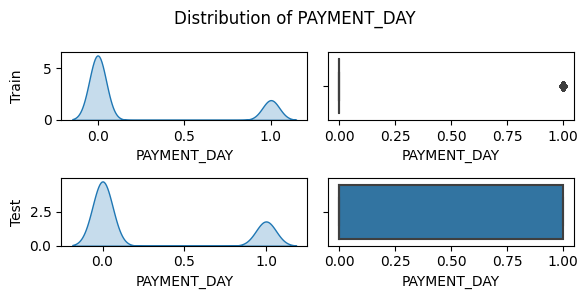

In [282]:
#'PAYMENT_DAY' : split every 15 days
# {0: "1quincena", 1:"2quincena"}
curr_col_name = "PAYMENT_DAY"
app_train_cop.loc[app_train_cop[curr_col_name] <= 15, curr_col_name] = 0
app_train_cop.loc[app_train_cop[curr_col_name] > 15, curr_col_name] = 1
app_test_cop.loc[app_test_cop[curr_col_name] <= 15, curr_col_name] = 0
app_test_cop.loc[app_test_cop[curr_col_name] > 15, curr_col_name] = 1


plotting_distribution(curr_col_name,app_train_cop,app_test_cop)



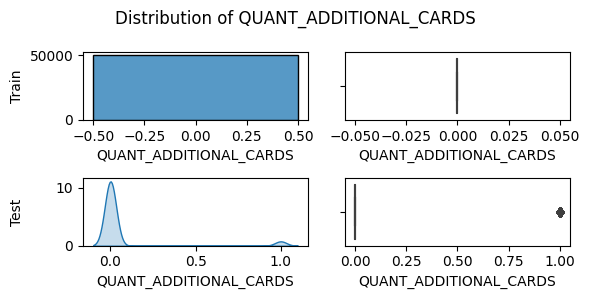

In [283]:
from sklearn.impute import SimpleImputer
#'QUANT_ADDITIONAL_CARDS' tiene solo un valor (0), se puede eliminar.
# idea: colocar como binario si tiene o no tiene una tarjeta adicional
# se reemplazaran tanto en test con el valor mas frequente de toda
# la distribucion (train + test), valor_frecuente = 0 (sin tarjeta)
# sigue siendo variable numerica
curr_col_name = "QUANT_ADDITIONAL_CARDS"
# cast to binary numerical categories {0: have a card, 1: don't have a card}
app_train_cop[curr_col_name].replace({0:0, 1:1, 2:1},inplace=True)
app_test_cop[curr_col_name].replace({0:0, 1:1, 2:1},inplace=True)

#impute nans in testing with 0 (most frequent from train)
imp_const_zero = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
app_test_cop[curr_col_name]=imp_const_zero.fit_transform(app_test_cop[[curr_col_name]]).ravel()

plotting_distribution(curr_col_name,app_train_cop,app_test_cop)


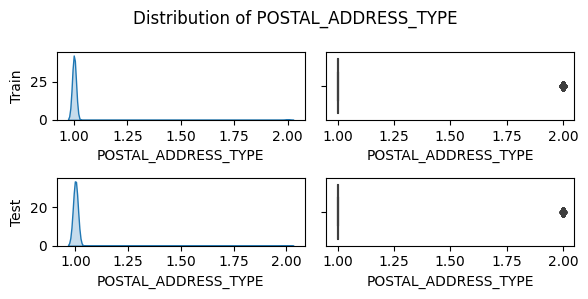

In [284]:

#'POSTAL_ADDRESS_TYPE' tiene (1=49673, 2=327) 
# se puede eliminar por la disparidad de valores.
# keep values it could be deleted after of seeing feature importances
curr_col_name = "POSTAL_ADDRESS_TYPE"
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)



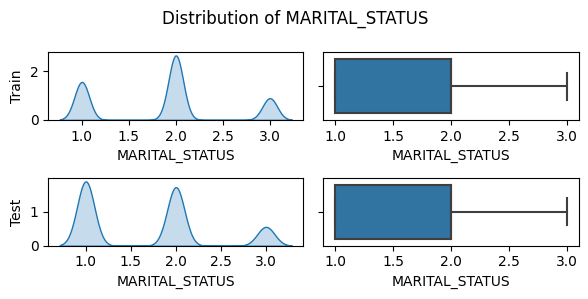

In [285]:
#'MARITAL_STATUS' tiene números del 0 al 7, 
#la mayoría están concentrados en (1=15286, 2=25967), 
#los otros números podemos codificarlo como indeterminado 
#para no eliminar esta columnas.
# regards to this standard https://international.ipums.org/international-action/variables/MARST#codes_section
# 0	NIU (not in universe)
# 1	Single/never married *	
# 2	Married/in union *
# 3	Separated/divorced/spouse absent
# 4	Widowed
curr_col_name = "MARITAL_STATUS"
# {single:1, married: 2, rest:3}
app_train_cop[~app_train_cop[curr_col_name].between(1,2)] = 3
app_test_cop[~app_test_cop[curr_col_name].between(1,2)] = 3

# fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8,2))
# sns.countplot(ax=axes[0],data=app_train_cop, y=curr_col_name)
# sns.countplot(ax=axes[1],data=app_test_cop, y=curr_col_name)
# plt.show()

plotting_distribution(curr_col_name,app_train_cop,app_test_cop)

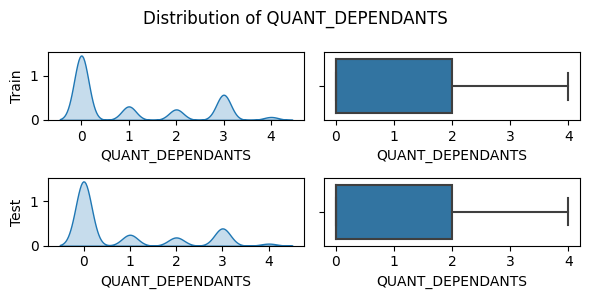

In [286]:
# 'QUANT_DEPENDANTS' tiene números de 0 hasta el 13 y el 53, 
# podemos clasificar con si y no, o en 0, 1, 2, 3 y 4+.
# summarizing, in range[0,1,2,3,4+]
curr_col_name = "QUANT_DEPENDANTS"
app_train_cop.loc[app_train_cop[curr_col_name]>4,curr_col_name] = 4
app_test_cop.loc[app_test_cop[curr_col_name]>4,curr_col_name] = 4

plotting_distribution(curr_col_name,app_train_cop,app_test_cop)

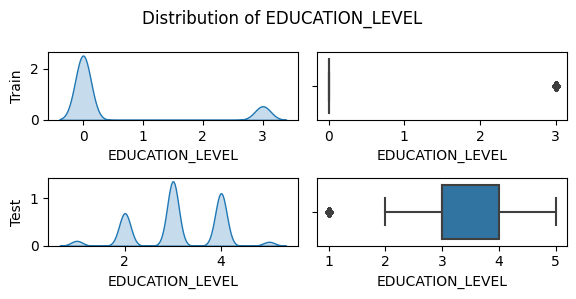

In [287]:
#'EDUCATION_LEVEL' solo tiene un numero 0, se puede eliminar.
# 5 Profesional Education o 1
# 0:secundaria completa, 1:tienen estudios superiores
curr_col_name = "EDUCATION_LEVEL"
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)